# Panda and scikit-learn homework 


## Contextual informations:
* All data are fictive and located in etude-de-cas.csv
* the target _'**cible**'_ can only have one of these values: [0,1]
* the first column is a row index.
* Empty fields should be considered as missing data.

## What's the purpose of this modele?
The task is to build a predictive model for the variable named _'**cible**'_. The prediction will be made based on the value of other variables ( columns [X1..X15] from the csv file ).
As the target can only have two different values, it is a binary classification problem.


## What kind of problem do we have?
All samples are given with a value for **cible**, they are labeled. So we will used ** supervised learning ** tools to solve this problem.

## Notebook initialization

In [2]:
#common library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from seaborn import set_style

In [2]:
# notebook specific
set_style("darkgrid")
%matplotlib inline
pd.set_option("max_rows", 10)
np.set_printoptions(suppress=True)

## Load data from csv

In [3]:
#Uncomment one file_location in the code below.
# If you're behind a proxy and can not direct download 
# just retrieve the file from github and upload it to the root of your jupiter notebook
#file_location = "https://www.dropbox.com/s/oxqmyc21y0rilk1/etude_de_cas.csv?raw=1"
file_location = "https://github.com/sdiop/ml-study-gemin/blob/master/data/etude_de_cas.csv?raw=true"
#file_location = "etude_de_cas.csv"

# load the dataframe from the string
df = pd.read_csv(file_location, sep=";",header=0, index_col=0)

##  Quick Data analysis

In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80000 entries, 1 to 80000
Data columns (total 16 columns):
X1       79872 non-null float64
X2       80000 non-null int64
X3       80000 non-null int64
X4       80000 non-null object
X5       79371 non-null float64
X6       80000 non-null object
X7       80000 non-null int64
X8       79925 non-null float64
X9       79872 non-null float64
X10      79477 non-null float64
X11      79477 non-null float64
X12      79925 non-null float64
X13      79925 non-null float64
X14      79001 non-null float64
X15      80000 non-null int64
cible    80000 non-null int64
dtypes: float64(9), int64(5), object(2)
memory usage: 10.4+ MB
None


* 80000 samples
* 15 features _[X1..X15]_
* 1 target _[cible]_
* values are float, integers or strings _[X4, X6]_
* missing values are located in these columns: _[X1, X5, X8, X9, X10, X11, X12, X13, X14]_
* might have some kind of correlation _(X1,X9) (X8,X12,X13) (X10,X11)_. These values have stricly the same number of missing values...

In [5]:
# Print top 5 observation of dataset
print (df.head())

         X1  X2  X3     X4        X5       X6  X7        X8   X9   X10   X11  \
id                                                                             
1   1015.25  18   1  9,251  1.260908   351,38   8  290461.0  0.0 -0.46  1.11   
2    248.86   8   0  4,493  1.106144      413   9   34228.0  0.0  0.64  1.19   
3    179.88  10   0  4,896  1.480565  1376,72   7  244860.0  0.0  0.52  1.17   
4    719.93  10   0  5,837  1.401922   1263,6  10    5401.0  0.0 -0.46  1.16   
5     14.30   6   1  0,937  1.106705       75   8  781155.0  0.0  0.61  1.17   

          X12        X13   X14  X15  cible  
id                                          
1   289953.38  290460.94   1.0   10      0  
2    36046.58   37724.79   4.0   16      1  
3   245050.07  245363.97  39.0   16      0  
4     5426.54    6088.62   2.0    7      0  
5   781147.86  781155.00  47.0    3      0  


_[X4, X6]_ are not really string objects, it seems they just have a different decimal separator. 

In [6]:
print(df['cible'].value_counts())

0    72541
1     7459
Name: cible, dtype: int64


0 values are dominant, only 9% of target values are 1!

## Fix the decimal separator

In [7]:
# replace the semicolon and cast to float
df['X4']=df['X4'].apply(lambda x: float(x.replace(',','.')))
df['X6']=df['X6'].apply(lambda x: float(x.replace(',','.')))

In [8]:
# check the features types
print(df['X4'].dtypes)
print(df['X6'].dtypes)

float64
float64


## Dealing with missing values

In [9]:
# Impute missing values using Imputer in sklearn.preprocessing
from sklearn.preprocessing import Imputer
     
# other possible strategy 'mean' and 'most_frequent'
imp = Imputer(missing_values='NaN', strategy='median', axis=0)
imp.fit(df)

# Assign X as a DataFrame of features and y as a Series of the outcome variable
df_t = pd.DataFrame(data=imp.transform(df), columns=df.columns)
X=df_t.drop("cible", axis=1).values
y=df_t.cible.values

df_t.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,cible
0,1015.25,18.0,1.0,9.251,1.260908,351.38,8.0,290461.0,0.0,-0.46,1.11,289953.38,290460.94,1.0,10.0,0.0
1,248.86,8.0,0.0,4.493,1.106144,413.00,9.0,34228.0,0.0,0.64,1.19,36046.58,37724.79,4.0,16.0,1.0
2,179.88,10.0,0.0,4.896,1.480565,1376.72,7.0,244860.0,0.0,0.52,1.17,245050.07,245363.97,39.0,16.0,0.0
3,719.93,10.0,0.0,5.837,1.401922,1263.60,10.0,5401.0,0.0,-0.46,1.16,5426.54,6088.62,2.0,7.0,0.0
4,14.30,6.0,1.0,0.937,1.106705,75.00,8.0,781155.0,0.0,0.61,1.17,781147.86,781155.00,47.0,3.0,0.0


## Prepare training & test sets

Samples from csv file will be split in a training set and a test set. We go for the arbitrary repartition (70% training, 30% test ). We also want to have the same dispersion of 'cible' in the two sets _(stratify=y)_. 

In [10]:
from sklearn.model_selection import train_test_split

# Use train to split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42, stratify=y)

## Model building ( 1st iteration )

**Reminder:**
* samples : 80000 ( <100K )
* classification problem
* numeric values

According to [sklearn flowchart](http://scikit-learn.org/stable/tutorial/machine_learning_map/index.html), we could use these algorithms to solve our problem:
* LinearSVC
* KNeighborsClassifier
* SVC
* Ensemble Classifiers

For the first iteration I chose to try a KNeighborsClassifier.

In [11]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

#Instanciate the model
knn=KNeighborsClassifier()

#fitting the model
knn.fit(X_train, y_train)

# predict the response
y_predicted = knn.predict(X_test)

# evaluate
print (accuracy_score(y_test, y_predicted))

0.919541666667


We already saw that only 9% of the targets have the value 1 in the dataset. A predictor which always predict the value 0 will also have a 91% accuracy... **So we can't rely on default standard accuracy to evaluate the estimator**

## Estimator evaluation

Metrics used for model selection are very important, here we have a classification problem so we can use at leat one of these tools:
* confusion matrix
* classification report
* AUC_ROC for scoring

In [12]:
from sklearn import metrics

# plot ROC curve
def plot_roc(model, x_ , y_):
    # Compute predicted probabilities: y_pred_prob
    y_pred_prob = model.predict_proba(x_)[:,1]

    # Generate ROC curve values: fpr, tpr, thresholds
    fpr, tpr, thresholds = metrics.roc_curve(y_ , y_pred_prob)

    # Plot ROC curve
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.show()

# compute confusion matrix, auc and confusion matrix
def predictor_performance( model, x_, expected):
    predicted = model.predict(x_)
    
    # Compute predicted probabilities: y_pred_prob
    y_pred_prob = model.predict_proba(x_)[:,1]
    
    print("AUC score: {}\n".format(metrics.roc_auc_score(expected, y_pred_prob)))
    print("classification report:\n{}\n".format(metrics.classification_report(expected, predicted, target_names=["cible 0", "cible 1"])))
    print("confusion matrix:\n{}\n".format(metrics.confusion_matrix(expected, predicted)))


AUC score: 0.780524446816355

classification report:
             precision    recall  f1-score   support

    cible 0       0.92      0.99      0.96     21762
    cible 1       0.74      0.21      0.33      2238

avg / total       0.91      0.92      0.90     24000


confusion matrix:
[[21591   171]
 [ 1760   478]]



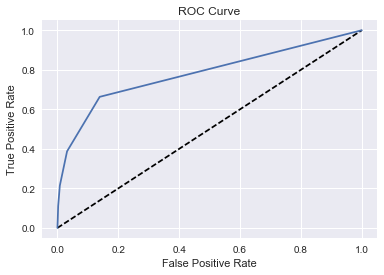

In [13]:
knn.fit(X_train, y_train)
predictor_performance(knn, X_test ,y_test)
plot_roc(knn, X_test, y_test)

1760 is quite a lot of False positive, let's try improve our etimator

## Model Building ( Second Iteration)

To improve the knn classifier I could try:

* weighed voting.
* Rescaling/Normalise our data
* Reduce Dimensionality ( PCA technique? )
* Approximate Nearest Neighbor techniques (k-d trees?)
* Tuning hyperparameters ( distance metric, etc. )


In [14]:
print(df_t.describe())

                  X1            X2            X3            X4            X5  \
count   80000.000000  80000.000000  80000.000000  80000.000000  80000.000000   
mean     1167.435532     10.818687      0.322600      5.623617      1.224943   
std      5906.184107      3.660421      0.467474      2.289440      1.402947   
min         0.000000      0.000000      0.000000      0.074000    -37.217261   
25%        85.337500      8.000000      0.000000      3.984000      1.118671   
50%       328.035000     11.000000      0.000000      5.491000      1.231385   
75%       972.850000     13.000000      1.000000      7.113000      1.371940   
max    755300.450000     30.000000      1.000000     19.509000     44.599501   

                 X6            X7            X8            X9           X10  \
count  8.000000e+04  80000.000000  8.000000e+04  80000.000000  80000.000000   
mean   1.220462e+03      8.242075  3.594676e+06      0.096288      0.121245   
std    7.979689e+03      1.692390  6.33315

* _(X8,X12,X13)_ seems to be correlated => let's build a scatter matrix, we migth recognize some paterns between features.
* _(X1, X6, X8/X12/X13)_ have a huge variance => have a closer look at feature distribution 

In [15]:
# Plot histograms to show distribution of features by outcome categories
def plot_histogram_dv(x,y):
    plt.hist(list(x[y==0]), alpha=0.5, label='Cible=0')
    plt.hist(list(x[y==1]), alpha=0.5, label='Cible=1')
    plt.title("Histogram of '{var_name}' by Cible target".format(var_name=x.name))
    plt.xlabel("Values")
    plt.ylabel("Frequency")
    plt.legend(loc='upper right')
    plt.show()

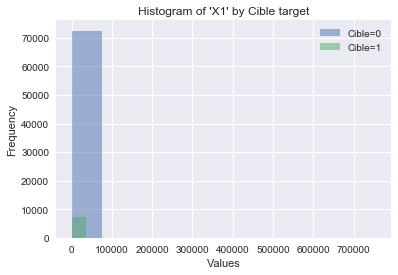

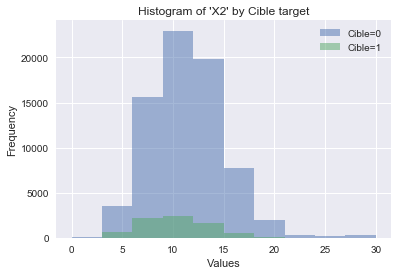

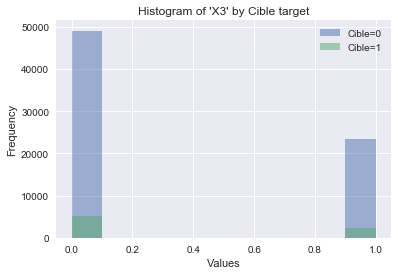

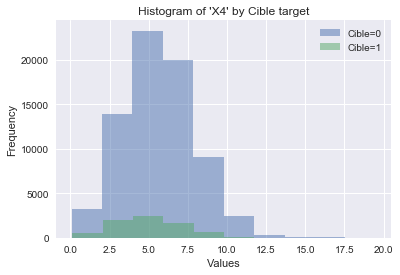

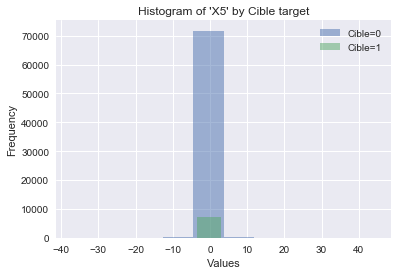

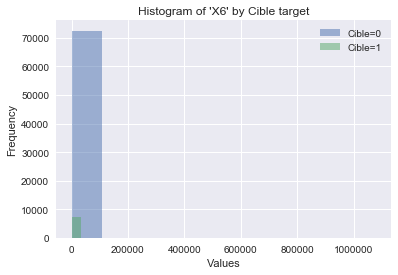

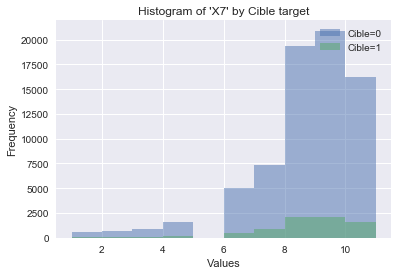

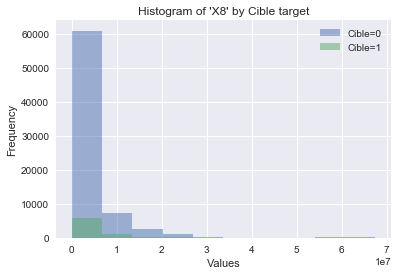

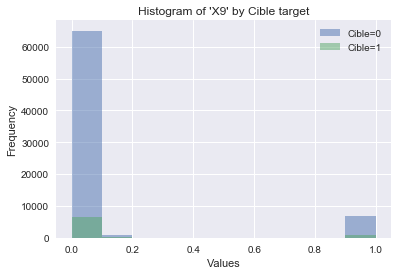

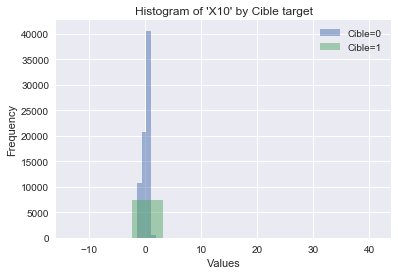

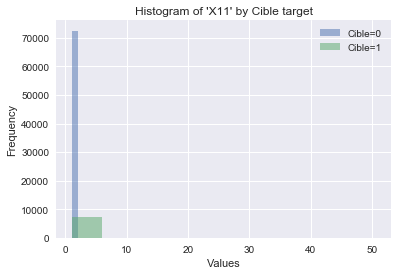

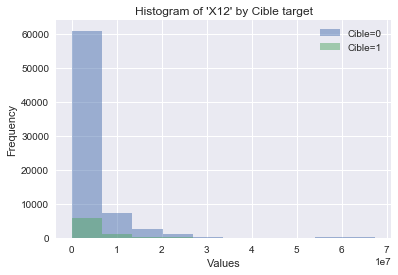

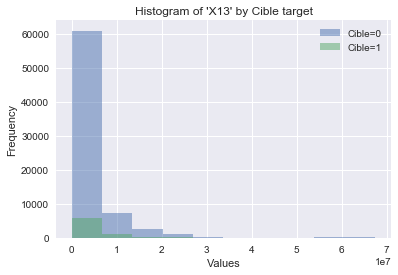

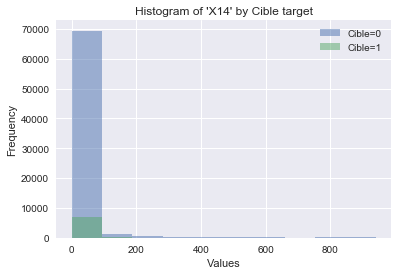

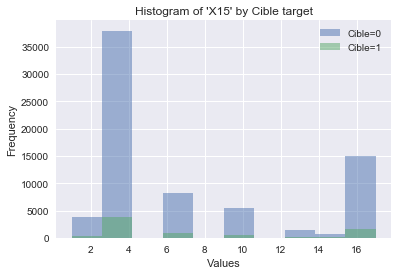

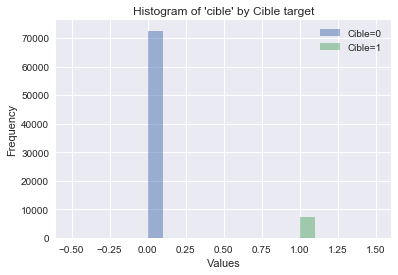

In [16]:
for feature in df_t.keys():
    plot_histogram_dv(df_t[feature], df_t.cible)

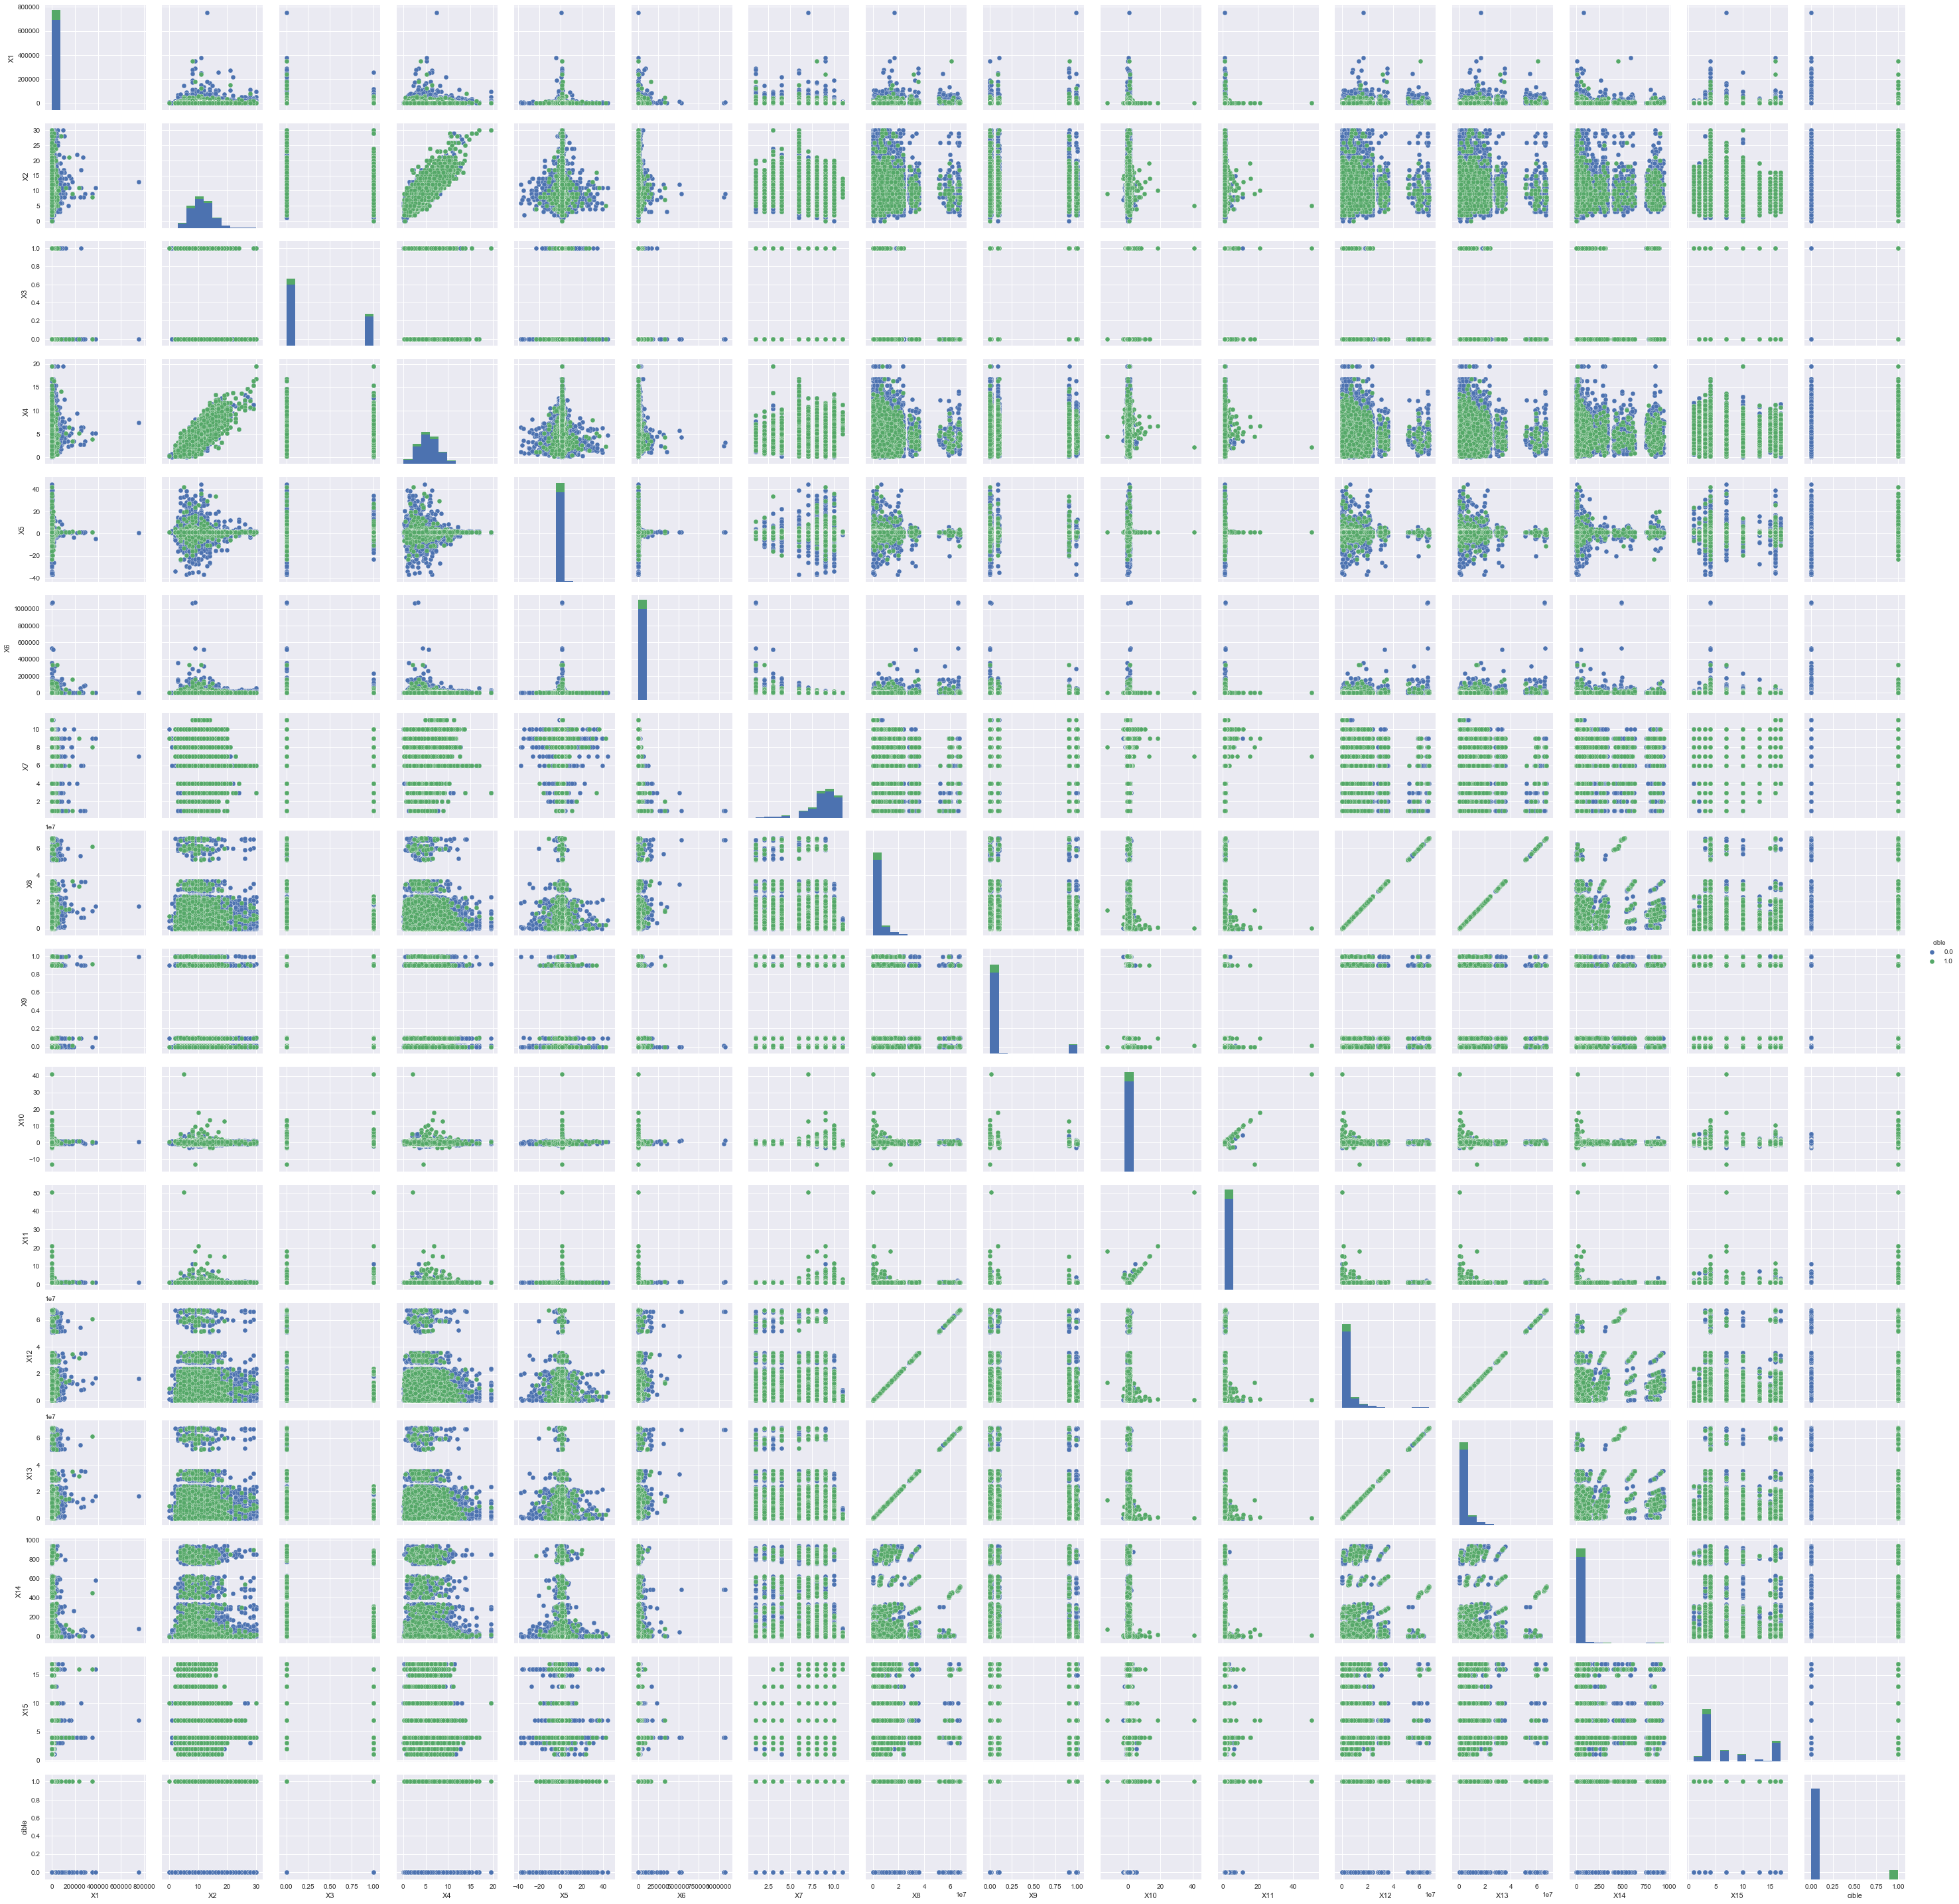

In [17]:
sns.pairplot(df_t, hue='cible')

* X8/X12/X13 are strongly correlated
* X10 /X11 are coorelated
* X2/X4 might be correlated.
* data relative to X15 are horizontally or verticaly evenly distributed. It might be a date or a numerical value from an other column.
* same as X7

## Validation curve

In [20]:
from sklearn.model_selection import validation_curve

# draw the evolution of AUC for training and test sets when n_neighbors in [1,31] range
def plot_validation_curve(model,x_,y_): 
    neighbors = np.arange(1, 31,2)
    train_scores, test_scores = validation_curve(model,
                                                 x_, y_,
                                                 param_name="n_neighbors",
                                                 param_range=neighbors,
                                                 scoring="roc_auc",
                                                 n_jobs=4,
                                                 cv = 5)
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    # Generate plot
    plt.figure(figsize=(9,5))
    plt.title('k-NN: Varying Number of Neighbors')
    plt.plot(neighbors, train_scores_mean, label = 'Training')
    plt.plot(neighbors, test_scores_mean, label = 'Test' )
    plt.ylim(0.65, 1)
    plt.legend(loc="best")
    plt.xlabel('Number of Neighbors')
    plt.ylabel('AUC score')
    plt.show()

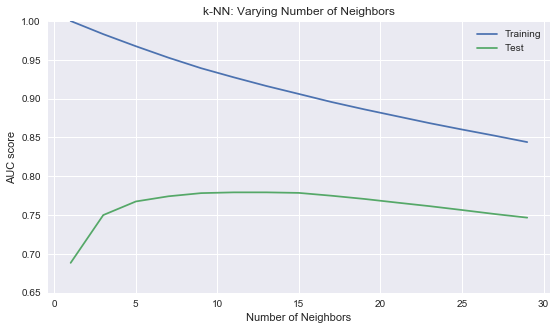

In [21]:
plot_validation_curve(KNeighborsClassifier(), X_train, y_train)

For n_neighbors parameter, the sweep spot to avoid complexity is between 10 and 15. We should stay in this range to avoid overfiting.

## Hyperparameter tuning with pipeline and RandomizedSearchCV

Putting almost all together:
    * hyperparameter tuning
    * knn__n_neighbors in [10..15] range to stay in the sweet spot and avoid overfitting
    * cross validation
    * Data normalization

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] knn__weights=uniform, knn__p=1, knn__n_neighbors=11, knn__metric=minkowski, knn__algorithm=kd_tree 
[CV]  knn__weights=uniform, knn__p=1, knn__n_neighbors=11, knn__metric=minkowski, knn__algorithm=kd_tree, score=0.950656, total=   0.9s
[CV] knn__weights=uniform, knn__p=1, knn__n_neighbors=11, knn__metric=minkowski, knn__algorithm=kd_tree 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.8s remaining:    0.0s


[CV]  knn__weights=uniform, knn__p=1, knn__n_neighbors=11, knn__metric=minkowski, knn__algorithm=kd_tree, score=0.958382, total=   0.9s
[CV] knn__weights=uniform, knn__p=1, knn__n_neighbors=11, knn__metric=minkowski, knn__algorithm=kd_tree 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    8.8s remaining:    0.0s


[CV]  knn__weights=uniform, knn__p=1, knn__n_neighbors=11, knn__metric=minkowski, knn__algorithm=kd_tree, score=0.953344, total=   0.8s
[CV] knn__weights=uniform, knn__p=1, knn__n_neighbors=11, knn__metric=minkowski, knn__algorithm=kd_tree 


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   12.9s remaining:    0.0s


[CV]  knn__weights=uniform, knn__p=1, knn__n_neighbors=11, knn__metric=minkowski, knn__algorithm=kd_tree, score=0.958660, total=   1.0s
[CV] knn__weights=uniform, knn__p=1, knn__n_neighbors=11, knn__metric=minkowski, knn__algorithm=kd_tree 


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   17.1s remaining:    0.0s


[CV]  knn__weights=uniform, knn__p=1, knn__n_neighbors=11, knn__metric=minkowski, knn__algorithm=kd_tree, score=0.954020, total=   1.5s
[CV] knn__weights=uniform, knn__p=2, knn__n_neighbors=10, knn__metric=minkowski, knn__algorithm=auto 
[CV]  knn__weights=uniform, knn__p=2, knn__n_neighbors=10, knn__metric=minkowski, knn__algorithm=auto, score=0.933148, total=   0.6s
[CV] knn__weights=uniform, knn__p=2, knn__n_neighbors=10, knn__metric=minkowski, knn__algorithm=auto 
[CV]  knn__weights=uniform, knn__p=2, knn__n_neighbors=10, knn__metric=minkowski, knn__algorithm=auto, score=0.941348, total=   0.6s
[CV] knn__weights=uniform, knn__p=2, knn__n_neighbors=10, knn__metric=minkowski, knn__algorithm=auto 
[CV]  knn__weights=uniform, knn__p=2, knn__n_neighbors=10, knn__metric=minkowski, knn__algorithm=auto, score=0.937853, total=   0.7s
[CV] knn__weights=uniform, knn__p=2, knn__n_neighbors=10, knn__metric=minkowski, knn__algorithm=auto 
[CV]  knn__weights=uniform, knn__p=2, knn__n_neighbors=10

[CV]  knn__weights=distance, knn__p=1, knn__n_neighbors=13, knn__metric=euclidean, knn__algorithm=ball_tree, score=0.949673, total=   8.7s
[CV] knn__weights=distance, knn__p=1, knn__n_neighbors=13, knn__metric=euclidean, knn__algorithm=ball_tree 
[CV]  knn__weights=distance, knn__p=1, knn__n_neighbors=13, knn__metric=euclidean, knn__algorithm=ball_tree, score=0.946623, total=   5.7s
[CV] knn__weights=distance, knn__p=1, knn__n_neighbors=10, knn__metric=euclidean, knn__algorithm=ball_tree 
[CV]  knn__weights=distance, knn__p=1, knn__n_neighbors=10, knn__metric=euclidean, knn__algorithm=ball_tree, score=0.934230, total=   5.6s
[CV] knn__weights=distance, knn__p=1, knn__n_neighbors=10, knn__metric=euclidean, knn__algorithm=ball_tree 
[CV]  knn__weights=distance, knn__p=1, knn__n_neighbors=10, knn__metric=euclidean, knn__algorithm=ball_tree, score=0.942457, total=   7.5s
[CV] knn__weights=distance, knn__p=1, knn__n_neighbors=10, knn__metric=euclidean, knn__algorithm=ball_tree 
[CV]  knn__w

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed: 16.8min finished


AUC score: 0.9570031683237599

classification report:
             precision    recall  f1-score   support

    cible 0       0.97      0.96      0.96     21762
    cible 1       0.65      0.69      0.67      2238

avg / total       0.94      0.94      0.94     24000


confusion matrix:
[[20913   849]
 [  684  1554]]



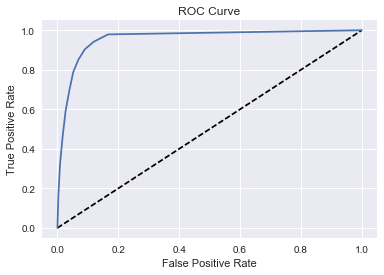

In [18]:
# Import the necessary modules
from sklearn.preprocessing import StandardScaler, Normalizer, RobustScaler
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.metrics import accuracy_score
from scipy.stats import expon
        
# Create the pipeline: pipeline
steps = [('Normalizer', Normalizer()), ('knn', KNeighborsClassifier())]
pipe = Pipeline(steps)

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42, stratify=y)

#['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights']
# I didn't include "brute" algorithm, as it requires too much cpu for my laptop :-(
params = {  "knn__n_neighbors": np.arange(10, 15,1),
            "knn__metric": ["euclidean","minkowski"],
            "knn__algorithm" : ["auto", "ball_tree", "kd_tree"],
            "knn__weights":["uniform","distance"],
            "knn__p": [1,2]
}

rs = RandomizedSearchCV(pipe, param_distributions=params, n_iter=10, scoring="roc_auc", cv=5, verbose=5)
rs.fit(X_train, y_train)

#Print the tuned parameters and score
print("Knn best parameters: {}\n".format(rs.best_params_))
print("Knn best estimator: {}\n".format(rs.best_estimator_)) 
print("Best score is {}\n".format(rs.best_score_))
predictor_performance(rs, X_test ,y_test)
plot_roc(rs, X_test, y_test)

The result of this quick random search is much better than the previous iteration:
           
* AUC: 0.957
* we now are far better for cible='1' prediction, but it's not that good for cible= '0' => there may have some room for improvement.
* still quite a few FP for cible = 1 (684)

## Reduce Dimensionality

Here what I tried:
1. Principal component analysis (PCA): it works on this dataset as we already identify some highly correlated variables in our dataset. Unfortunately, PCA makes models a lot harder to interpret.
2. sklearn.feature_selection : we don't loose the column names but I had no sucess with various value of columns to retain.
3. Selecting manually some columns that might have no or some redondant information for classification purpose. I choose:
    * 'X12'
    * 'X10'
    * 'X1'
    * 'X5'
    * 'X6'
The feature selection was mainly due to my intuition, with no formal proof. You will see the results below.

I let the source code in the notebook for PCA but didn't used it.

     X2   X3     X4    X7        X8   X9   X11        X13   X14   X15
0  18.0  1.0  9.251   8.0  290461.0  0.0  1.11  290460.94   1.0  10.0
1   8.0  0.0  4.493   9.0   34228.0  0.0  1.19   37724.79   4.0  16.0
2  10.0  0.0  4.896   7.0  244860.0  0.0  1.17  245363.97  39.0  16.0
3  10.0  0.0  5.837  10.0    5401.0  0.0  1.16    6088.62   2.0   7.0
4   6.0  1.0  0.937   8.0  781155.0  0.0  1.17  781155.00  47.0   3.0
Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] knn__weights=distance, knn__p=1, knn__n_neighbors=11, knn__metric=euclidean, knn__algorithm=auto 
[CV]  knn__weights=distance, knn__p=1, knn__n_neighbors=11, knn__metric=euclidean, knn__algorithm=auto, score=0.956876, total=   0.4s
[CV] knn__weights=distance, knn__p=1, knn__n_neighbors=11, knn__metric=euclidean, knn__algorithm=auto 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.0s remaining:    0.0s


[CV]  knn__weights=distance, knn__p=1, knn__n_neighbors=11, knn__metric=euclidean, knn__algorithm=auto, score=0.955793, total=   0.6s
[CV] knn__weights=distance, knn__p=1, knn__n_neighbors=11, knn__metric=euclidean, knn__algorithm=auto 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    4.3s remaining:    0.0s


[CV]  knn__weights=distance, knn__p=1, knn__n_neighbors=11, knn__metric=euclidean, knn__algorithm=auto, score=0.957337, total=   0.4s
[CV] knn__weights=distance, knn__p=1, knn__n_neighbors=11, knn__metric=euclidean, knn__algorithm=auto 


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    6.2s remaining:    0.0s


[CV]  knn__weights=distance, knn__p=1, knn__n_neighbors=11, knn__metric=euclidean, knn__algorithm=auto, score=0.951977, total=   0.4s
[CV] knn__weights=distance, knn__p=1, knn__n_neighbors=11, knn__metric=euclidean, knn__algorithm=auto 


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    7.8s remaining:    0.0s


[CV]  knn__weights=distance, knn__p=1, knn__n_neighbors=11, knn__metric=euclidean, knn__algorithm=auto, score=0.955495, total=   0.5s
[CV] knn__weights=uniform, knn__p=1, knn__n_neighbors=10, knn__metric=euclidean, knn__algorithm=ball_tree 
[CV]  knn__weights=uniform, knn__p=1, knn__n_neighbors=10, knn__metric=euclidean, knn__algorithm=ball_tree, score=0.955385, total=   4.1s
[CV] knn__weights=uniform, knn__p=1, knn__n_neighbors=10, knn__metric=euclidean, knn__algorithm=ball_tree 
[CV]  knn__weights=uniform, knn__p=1, knn__n_neighbors=10, knn__metric=euclidean, knn__algorithm=ball_tree, score=0.954292, total=   3.2s
[CV] knn__weights=uniform, knn__p=1, knn__n_neighbors=10, knn__metric=euclidean, knn__algorithm=ball_tree 
[CV]  knn__weights=uniform, knn__p=1, knn__n_neighbors=10, knn__metric=euclidean, knn__algorithm=ball_tree, score=0.954784, total=   4.0s
[CV] knn__weights=uniform, knn__p=1, knn__n_neighbors=10, knn__metric=euclidean, knn__algorithm=ball_tree 
[CV]  knn__weights=unifo

[CV]  knn__weights=distance, knn__p=1, knn__n_neighbors=10, knn__metric=euclidean, knn__algorithm=ball_tree, score=0.950502, total=   3.5s
[CV] knn__weights=distance, knn__p=1, knn__n_neighbors=10, knn__metric=euclidean, knn__algorithm=ball_tree 
[CV]  knn__weights=distance, knn__p=1, knn__n_neighbors=10, knn__metric=euclidean, knn__algorithm=ball_tree, score=0.954245, total=   3.3s
[CV] knn__weights=uniform, knn__p=2, knn__n_neighbors=13, knn__metric=euclidean, knn__algorithm=kd_tree 
[CV]  knn__weights=uniform, knn__p=2, knn__n_neighbors=13, knn__metric=euclidean, knn__algorithm=kd_tree, score=0.957205, total=   0.4s
[CV] knn__weights=uniform, knn__p=2, knn__n_neighbors=13, knn__metric=euclidean, knn__algorithm=kd_tree 
[CV]  knn__weights=uniform, knn__p=2, knn__n_neighbors=13, knn__metric=euclidean, knn__algorithm=kd_tree, score=0.955556, total=   0.4s
[CV] knn__weights=uniform, knn__p=2, knn__n_neighbors=13, knn__metric=euclidean, knn__algorithm=kd_tree 
[CV]  knn__weights=uniform,

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  7.2min finished


AUC score: 0.9643642319022123

classification report:
             precision    recall  f1-score   support

    cible 0       0.97      0.96      0.96     21762
    cible 1       0.62      0.69      0.65      2238

avg / total       0.94      0.93      0.93     24000


confusion matrix:
[[20803   959]
 [  683  1555]]



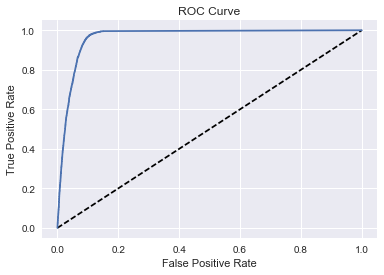

In [19]:
X_light= df_t.drop(['X12','X10','X1','X5','X6',"cible"], axis=1).values
# Create train and test sets
X_light_train, X_light_test, y_train, y_test = train_test_split(X_light, y, test_size=0.30, random_state=42, stratify=y)

rs.fit(X_light_train, y_train)
predictor_performance(rs, X_light_test ,y_test)
plot_roc(rs, X_light_test, y_test)

### Principal component analysis

In [24]:
# Use PCA from sklearn.decompostion to find principal components
from sklearn.decomposition import PCA

pca = PCA(n_components=9)
X_train_selected = pd.DataFrame(pca.fit_transform(X_train))
X_test_selected = pd.DataFrame(pca.fit_transform(X_test))

In [25]:
X_train_selected.head()

,0,1,2,3,4,5,6,7,8
0,2.947777e+07,-5836.465634,-613.780320,-1686.443549,-336.589786,-116.899621,-3.089273,0.697076,0.413537
1,-1.255303e+06,-478.123887,-30.284113,745.565101,132.534164,-23.412851,0.322086,-3.071095,1.084042
2,-1.852234e+06,129.707183,4746.658050,2270.206790,-133.987476,-18.429168,-2.839844,-2.304509,2.188511
3,5.433109e+06,237.294817,-2523.412005,1200.110183,433.977883,-45.654135,-0.749360,2.746840,0.512641
4,-5.406413e+06,-110.890931,2390.542294,402.689795,-174.754320,-8.304399,8.366376,1.961176,0.850272


## Conclusion

So far, based on the AUC score, we greatly improve the model ( AUC iteration1: 0.78052 , AUC iteration2: 0.95700  , AUC iteration 3: 0.96436.
There is really a gain from the starting point, but I'm not sure wich one to choose between the 2 lasts models:
* iteration 2 has a better confusion matrix
* iteration 3 a better AUC score and better ROC curve

Anyway there's room for improvement, that I might have tries if I wasn't short in time:
* try one or several other classification algorithm ( SVC ? )
* Combine several 'weak' classifiers to make a strong one